In [3]:
import spacy
from IPython.display import SVG
from spacy import displacy

# Intro to spaCy
We'll finish up our course by looking at `spaCy`, a great Python library for working with natural language processing. While most of the tools we've used so far have been rule-based, spaCy consists mostly of **statistical NLP** models. In statistical models, a large corpus of text is processed and mathematical methods are used to identify patterns in the corpus. This process is called **training**. Once a model has been trained, we can use it to analyze new text. 

spaCy comes with several pre-trained models, meaning that we can quickly load a model which has been trained on large amounts of data. This way, we can take advantage of work which has already been done by spaCy developers and focus on our own NLP tasks. In these notebooks, we'll see how combining spaCy's statistical models with rule-based systems offers a powerful way to process and analyze text.

## What we'll do today

We'll start by looking at the basic usage of spaCy. Next, we'll focus on specific NLP task, **named entity recognition (NER)**, and see how this works in spaCy, as well as some of the limitations with clinical data. Some of these limitations can be addressed by writing our own rules for concept extraction, and we'll practice that with some clinical texts. We'll then go a little deeper into how spaCy's models are implemented and how we can modify them. Finally, we'll end the day by spaCy models which were designed specifically for use in the biomedical domain.

# spaCy documentation

spaCy has great documentation. As we're going along today, try browsing through their documentation to find examples and instructions. Start by opening up these two pages and navigating through the documentation:

[Basic spaCy usage](https://spacy.io/usage/models)

[API documentation](https://spacy.io/api)

spaCy also has a really good, free online class. If you want to dig deeper into spaCy after this class, it's a great resource for using this library:
https://course.spacy.io/


# Basic usage of spaCy


In this notebook, we'll look at the basic fundamentals of spaCy:
- Main classes in spaCy
- Linguistic attributes available as part of default text processing
- Coding exercise

## How to use spaCy
At a high-level, here are the steps for using spaCy:
- Start by loading a pre-trained NLP model
- Process a string of text with the model
- Use the attributes in our processed documents for downstream NLP tasks like NER or document classification

For example, here's a very short example of how this works. For the sake of demonstration, we'll use this snippet of a recent, exciting news article:

In [4]:
# First, load a pre-trained model
nlp = spacy.load("en_core_web_sm")

In [5]:
# Process a string of text with the model
text = """Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California."""

doc = nlp(text)
doc

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday. 
The rooms sold out within two minutes.
The resort has been called “The Bell: A Taco Bell Hotel and Resort.” It’s located in Palm Springs, California.

In [6]:
# Use the attributes in our processed documents for downstream NLP tasks
# Here, we'll visualize the entities in this text identified through NER
displacy.render(doc, style="ent")

Let's dive a little deeper into how spaCy is structured and what we have to work with.

## spaCy architecture
The following diagram from spaCy's API documentation shows a basic overview of spaCy's architecture:

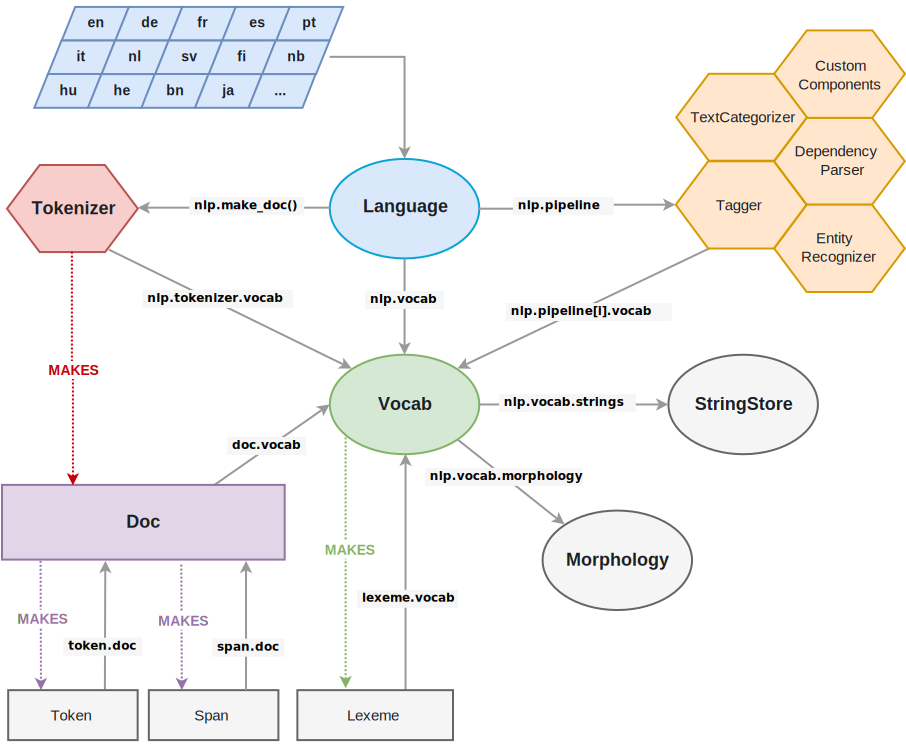

In [7]:
SVG('./images/spacy_architecture.svg')

# `Language` class
The `nlp` object in spaCy is the linguistic model which will be used for processing text. We instantiate a `Language` class by providing the name of a pre-trained model which we wish to use. We typically name this object `nlp`, and this will be our primary entry point.


Statistical, pre-trained, explain more

In [8]:
nlp = spacy.load("en_core_web_sm")
nlp

In [9]:
help(nlp)

Help on English in module spacy.lang.en object:

class English(spacy.language.Language)
 |  English(vocab=True, make_doc=True, max_length=1000000, meta={}, **kwargs)
 |  
 |  A text-processing pipeline. Usually you'll load this once per process,
 |  and pass the instance around your application.
 |  
 |  Defaults (class): Settings, data and factory methods for creating the `nlp`
 |      object and processing pipeline.
 |  lang (unicode): Two-letter language ID, i.e. ISO code.
 |  
 |  DOCS: https://spacy.io/api/language
 |  
 |  Method resolution order:
 |      English
 |      spacy.language.Language
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  Defaults = <class 'spacy.lang.en.EnglishDefaults'>
 |  
 |  
 |  lang = 'en'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from spacy.language.Language:
 |  
 |  __call__(self, text, disable=[], component_cfg=None)
 |      Apply the pipeline to some text

The `nlp` model we instantiated above is a **small** ("sm"), **English** ("en")-language model trained on **web** ("web") data, but there are currently 16 different models from 9 different languages. See the [spaCy documentation](https://spacy.io/usage/models) for more information on each of the models.

# Documents, spans and tokens
The `nlp` object is what we'll be using to process text. The next few classes represent the output of our NLP model.

## `Doc` class
The `doc` object represents a single document of text. To create a `doc` object, we call `nlp` on a string of text. This runs that text through a spaCy pipeline, which we'll learn more about in a future notebook.

In [10]:
text = 'Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.'

In [11]:
doc = nlp(text)

In [12]:
print(doc)

Taco Bell’s latest marketing venture, a pop-up hotel, opened at 10 a.m. Pacific Time Thursday.


## Tokens and Spans
A `Token` is a single word, symbol, or whitespace in a `doc`. When we create a `doc` object, the text broken up into individual tokens. This is called **"tokenization"**.

**Discussion**: Look at the tokens generated from this text snippet. What can you say about the tokenization method? Is it as simple as splitting up into words every time we reach a whitespace?

In [13]:
token = doc[0]

In [14]:
token

Taco

In [15]:
type(token)

spacy.tokens.token.Token

In [16]:
for token in doc:
    print(token)

Taco
Bell
’s
latest
marketing
venture
,
a
pop
-
up
hotel
,
opened
at
10
a.m.
Pacific
Time
Thursday
.


A `Span` is a slice of a document, or a consecutive sequence of tokens.

In [17]:
span = doc[1:4]

In [18]:
span

Bell’s latest

In [19]:
type(span)

spacy.tokens.span.Span

In [20]:
nlp.pipe_names

['tagger', 'parser', 'ner']

### POS Tagging
Parts of speech are categories of words. For example, "nouns", "verbs", and "adjectives" are all examples of parts of speech. Assigning parts of speech to words is useful for downstream NLP texts such as word sense disambiguation and named entity recognition.

**Discussion**: What to the POS tags below mean?

In [21]:
print(f"Token -> POS\n")
for token in doc:
    print(f"{token.text} -> {token.pos_}")

Token -> POS

Taco -> PROPN
Bell -> PROPN
’s -> PROPN
latest -> ADJ
marketing -> NOUN
venture -> NOUN
, -> PUNCT
a -> DET
pop -> NOUN
- -> PUNCT
up -> PART
hotel -> NOUN
, -> PUNCT
opened -> VERB
at -> ADP
10 -> NUM
a.m. -> NOUN
Pacific -> PROPN
Time -> PROPN
Thursday -> PROPN
. -> PUNCT


In [22]:
spacy.explain("PROPN")

'proper noun'

### Morphology
The morphology of a word refers to the form of a word. For example, "eat", "eats", and "ate" are all different inflections of the word "eat". We would say that "eat" is the **lemma** of all of these words.

In [23]:
print(f"Token -> Lemma\n")
for token in doc:
    print(f"{token.text} -> {token.lemma_}")

Token -> Lemma

Taco -> Taco
Bell -> Bell
’s -> ’s
latest -> late
marketing -> marketing
venture -> venture
, -> ,
a -> a
pop -> pop
- -> -
up -> up
hotel -> hotel
, -> ,
opened -> open
at -> at
10 -> 10
a.m. -> a.m.
Pacific -> Pacific
Time -> Time
Thursday -> Thursday
. -> .


### Dependency Parsing
In dependency parsing, we analyze the structure of a sentence. We won't spend too much time on this, but here is a nice visualization of dependency parse looks like. Take a minute to look at the arrows between words and try to figure out what they mean.

In [24]:
doc = nlp("The cat sat on the green mat")

In [25]:
displacy.render(doc, style='dep')

### Other attributes
Look at spaCy's [Token class documentation](https://spacy.io/api/token) for a full list of additional attributes available for each token in a document. We'll print out a few more.

**Discussion**: How can these attributes be useful in downstream NLP tasks?

In [31]:
doc = nlp("BitCoin rose 7.9% to $11,899 as of 11:53 a.m. in New York on Monday. "
    "https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension")

In [32]:
print(doc)

BitCoin rose 7.9% to $11,899 as of 11:53 a.m. in New York on Monday. https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension


The "shape" of the token:

In [33]:
print(doc[0])
print(doc[0].shape_)

BitCoin
XxxXxxx


The vector of a token (we'll learn more about this in the upcoming [statistical NLP class](https://datascience4health.bmi.utah.edu/statistical-nlp/) ).

In [36]:
token = doc[0]
for a in doc:
    print(a)

BitCoin
rose
7.9
%
to
$
11,899
as
of
11:53
a.m.
in
New
York
on
Monday
.
https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension


In [35]:
token.vector

array([ 7.858351  , -1.643801  , -3.1148496 , -3.0524282 , -1.0281262 ,
       -2.1283257 ,  2.989861  ,  0.04407418, -1.7212474 ,  5.564085  ,
        0.03169718, -1.5325528 , -3.5758169 , -3.6923654 , -1.49707   ,
       -3.2011178 ,  6.201381  ,  4.656876  ,  2.6509366 ,  1.5402999 ,
        1.9340342 , -2.0249949 ,  0.38422465,  3.399283  , -2.3781075 ,
       -2.5668373 , -0.6861349 , -0.09011304,  3.976987  ,  9.2918415 ,
        4.627211  ,  1.6617485 ,  0.34417936, -0.6041213 ,  0.16667011,
        3.3774421 , -3.5846174 ,  6.977968  ,  1.757913  , -1.6188469 ,
       -1.1839783 ,  1.9169161 ,  1.2924712 , -0.40237623,  0.9613967 ,
       -2.5556836 , -3.2167118 ,  1.5467368 ,  3.8123424 ,  0.65182966,
       -5.3715496 ,  2.4722314 , -2.7514367 , -4.317959  ,  0.16405404,
       -0.8927266 , -1.2269484 , -1.9794756 , -3.4130602 , -1.2929972 ,
       -1.3259505 , -0.17142749,  2.5984063 ,  1.8399029 , -2.758682  ,
        2.6744542 ,  2.6426115 , -3.737712  ,  0.9573764 , -1.72

In [71]:
token1 = nlp("cat")[0]
token2 = nlp("dog")[0]
token3 = nlp("¡?_")[0]

In [72]:
token1.similarity(token3)

/opt/conda/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.5484868

Whether the token resembles a:
- Number
- Punctuation
- Currency

In [76]:
print(doc[2])
print(doc[2].like_num)

7.9
True


In [77]:
print(doc[5])
print(doc[5].is_currency)

$
True


In [78]:
print(doc[-1])
print(doc[-1].like_url)

https://www.bloomberg.com/news/articles/2019-07-08/bitcoin-breakout-may-be-ahead-as-technicals-show-rally-extension
True


# Coding Exercises and Discussions
Now that we've seen some examples of what we can do with spaCy, let's practice with some coding exercises!

**1. Ambiguity** 

Consider these two sentences and look at the word "duck". Consider these questions and discuss them with a group:
- Are the two tokens "duck" in these two sentences identical? What does that tell us about a "token" vs. a normal string?
- When two words are spelled the same but have different meanings, they are "ambiguous". Using spaCy, what are some ways we we could "disambiguate" the word "duck" in these two sentences?

In [79]:
doc1 = nlp("The duck swam gently down the river.")
doc2 = nlp("He had to duck as he came through the door.")

In [ ]:
"the pt presents today to check his hypertension and afib"
"he will see pt to improve his finger strength"

In [80]:
duck1 = doc1[1]
duck2 = doc2[3]

In [81]:
duck1 == duck2

False

In [87]:
# Your code here
print(f"Token -> POS\n")
for token in doc1:
    print(f"{token.text} -> {token.pos_}")

print(f"\nToken -> POS\n")
for token in doc2:
    print(f"{token.text} -> {token.pos_}")
    
displacy.render(doc1, style='dep')
displacy.render(doc2, style='dep')



Token -> POS

The -> DET
duck -> NOUN
swam -> NOUN
gently -> ADV
down -> ADP
the -> DET
river -> NOUN
. -> PUNCT

Token -> POS

He -> PRON
had -> VERB
to -> PART
duck -> VERB
as -> ADP
he -> PRON
came -> VERB
through -> ADP
the -> DET
door -> NOUN
. -> PUNCT


**2. Count POS tags** 

Write a function that takes a Doc and returns a count of the number of each POS tag in that doc.

*Bonus*: Write a second function that plots a bar graph of these counts.

In [133]:
from collections import defaultdict
def count_pos_tags(doc):
    """
    
    """
    # Your code here
    d = defaultdict(int)
    #d={}
    #for pos in doc:
    #    d[pos.pos_]=0
    #start to sum up
    for pos in doc:
        d[pos.pos_] +=1
    return d

In [134]:
doc1 = nlp("The highly vivacious green paint is giving me a terrible, mind-splitting headache.")
doc2 = nlp("My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix.")
doc3 = nlp("On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, "
            "to replace Jean-Claude Juncker at the helm of the Commission.")

In [135]:
count_pos_tags(doc1)

defaultdict(int,
            {'DET': 2,
             'ADV': 1,
             'ADJ': 3,
             'NOUN': 4,
             'VERB': 2,
             'PRON': 1,
             'PUNCT': 3})

In [136]:
docs = (doc1, doc2, doc3)

In [ ]:
for doc in docs:
    print(count_pos_tags(doc))

**3. Sort by number of words with a certain POS tag**

Write a function that takes a list of Docs and a POS tag. Return a new list which is sorted in **descending order** by the number of tokens which have that POS tag. Use a default value of 'PROPN' for the argument `pos_tag`. Test this out using the list `docs` from the last exercise.

**Hint**: Use the built-in [sorted function](https://www.geeksforgeeks.org/sorted-function-python/) to sort the list, and use a lambda function to define the key which we should sort by.

In [263]:
def sort_by_pos(docs, pos_tag):
    """
    """
    dic = {}
    
    for doc in docs:
        dic[doc] = count_pos_tag(doc,pos_tag)
    
    sorted_docs = sorted(dic.items(), k = lambda x: )
    # Your code here
    #srtd_doc={}
    #for i in range(len(docs)):
    #    srtd_doc[i]=count_pos_tags(docs[i])
        
    #sorted_doc = sorted(srtd_doc[0:range(srtd_doc)], key=lambda sorting: srtd_doc[pos_tag])   # sort by age
    #a = sorted(srtd_doc{(0:2)}["DET"])
    #return srtd_doc.keys([0:2])
    #return srtd_doc[]
    
def count_pos_tag(doc, pos_tag):
    n = 0
    for token in doc:
        # Your code here
        if(token.pos_ == pos_tag):
            n +=1
    return n

In [264]:
# Sort by which documents have the most proper nouns
sort_by_pos(docs, 'PROPN')

dict_keys([The highly vivacious green paint is giving me a terrible, mind-splitting headache., My favorite activites are swimming, biking, reading, eating, and watching trashy shows on Netflix., On Tuesday, the 28 EU leaders chose Ursula von der Leyen, an ally of German Chancellor Angela Merkel, to replace Jean-Claude Juncker at the helm of the Commission.])

In [258]:
# Sort by which documents have the most verbs
sort_by_pos(docs, 'VERB')

TypeError: keys() takes no arguments (1 given)

In [197]:
# Sort by which documents have the most adjectives
sort_by_pos(docs, 'ADJ')

[0, 1, 2]

In [98]:
from spacy.lang.es.examples import sentences 

In [102]:
?spacy.load